# Coleta e Organização de Arquivo CSV

In [66]:
import pandas as pd

# Load the data, skipping the initial rows that are not part of the header
df = pd.read_csv('a133345189_28_143_208.csv', encoding='latin-1', sep=';', engine='python', skiprows=6)

# Rename the columns to their correct names
df.columns = ['Município'] + [str(year) for year in range(2010, 2020)] + ['Total']

df.head(10)

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,110040 Alto Paraíso,5,9,5,1,2,7,4,5,3,5,46.0
1,110034 Alvorada D'Oeste,7,2,4,4,6,4,4,5,1,4,41.0
2,110002 Ariquemes,33,49,46,51,28,38,33,26,28,26,358.0
3,110045 Buritis,12,6,7,9,15,5,15,5,5,6,85.0
4,110003 Cabixi,-,1,1,-,1,1,2,2,1,1,10.0
5,110060 Cacaulândia,-,1,2,-,1,-,2,1,1,-,8.0
6,110004 Cacoal,26,31,46,37,36,34,79,97,50,68,504.0
7,110070 Campo Novo de Rondônia,1,-,-,-,1,1,-,-,1,1,5.0
8,110080 Candeias do Jamari,6,8,8,16,7,12,4,11,7,5,84.0
9,110090 Castanheiras,-,-,-,3,3,4,2,1,1,1,15.0


In [67]:
print(df.columns)

Index(['Município', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'Total'],
      dtype='object')


In [68]:
# Substituir traços '-' por NaN (ausência de dados)
df.replace('-', pd.NA, inplace=True)

# Remover a coluna "Total", se existir
if 'Total' in df.columns:
    df.drop(columns='Total', inplace=True)

# Transforma de wide para long (tidy)
df_meltado = df.melt(id_vars='Município', var_name='Ano', value_name='Óbitos')

# Convert 'Óbitos' column to numeric, coercing errors
df_meltado['Óbitos'] = pd.to_numeric(df_meltado['Óbitos'], errors='coerce')


# Visualizar resultado
df_meltado.head(10)

,Município,Ano,Óbitos
0,110040 Alto Paraíso,2010,5.0
1,110034 Alvorada D'Oeste,2010,7.0
2,110002 Ariquemes,2010,33.0
3,110045 Buritis,2010,12.0
4,110003 Cabixi,2010,NaN
5,110060 Cacaulândia,2010,NaN
6,110004 Cacoal,2010,26.0
7,110070 Campo Novo de Rondônia,2010,1.0
8,110080 Candeias do Jamari,2010,6.0
9,110090 Castanheiras,2010,NaN


In [69]:
df_fortaleza = df_meltado[df_meltado['Município'].str.contains('Fortaleza', case=False)].copy()


In [70]:
# Separar código do nome do município
df_fortaleza[['Código', 'Nome']] = df_fortaleza['Município'].str.extract(r'(\d+)\s+(.+)')

# Mantendo só as colunas úteis
df_fortaleza = df_fortaleza[['Nome', 'Ano', 'Óbitos']]


In [71]:
df_fortaleza.to_csv('fortaleza_obitos_transito.csv', index=False)


# Dashboard e visualização | Power BI

In [72]:
# Bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exibir gráficos no notebook
%matplotlib inline

# Estilo de gráfico bonito
sns.set(style="whitegrid")


In [73]:
df = pd.read_csv('fortaleza_obitos_transito.csv')

# Verificando os dados
df.head(11)


,Nome,Ano,Óbitos
0,Fortaleza do Tabocão,2010,2.0
1,Fortaleza dos Nogueiras,2010,NaN
2,Fortaleza,2010,610.0
3,Cruzeiro da Fortaleza,2010,1.0
4,Fortaleza de Minas,2010,2.0
5,Fortaleza dos Valos,2010,NaN
6,Fortaleza do Tabocão,2011,3.0
7,Fortaleza dos Nogueiras,2011,NaN
8,Fortaleza,2011,648.0
9,Cruzeiro da Fortaleza,2011,4.0


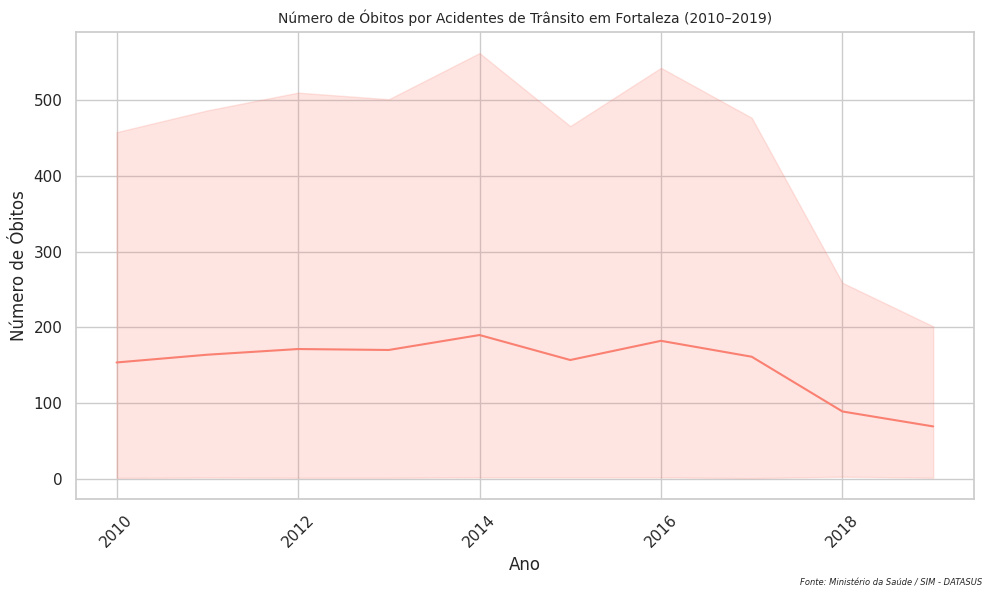

In [74]:
plt.figure(figsize=(10,6))
bar = sns.lineplot(data=df, x='Ano', y='Óbitos', color='salmon')

# Título com contexto
plt.title('Número de Óbitos por Acidentes de Trânsito em Fortaleza (2010–2019)', fontsize=10)

# Nome dos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Óbitos')

# Adicionando valores no topo de cada barra
for i in bar.containers:
    bar.bar_label(i, fmt='%.0f', label_type='edge', fontsize=9)

# Rodapé com a fonte dos dados
plt.figtext(0.99, 0.01, 'Fonte: Ministério da Saúde / SIM - DATASUS', ha='right', fontsize=6, style='italic')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

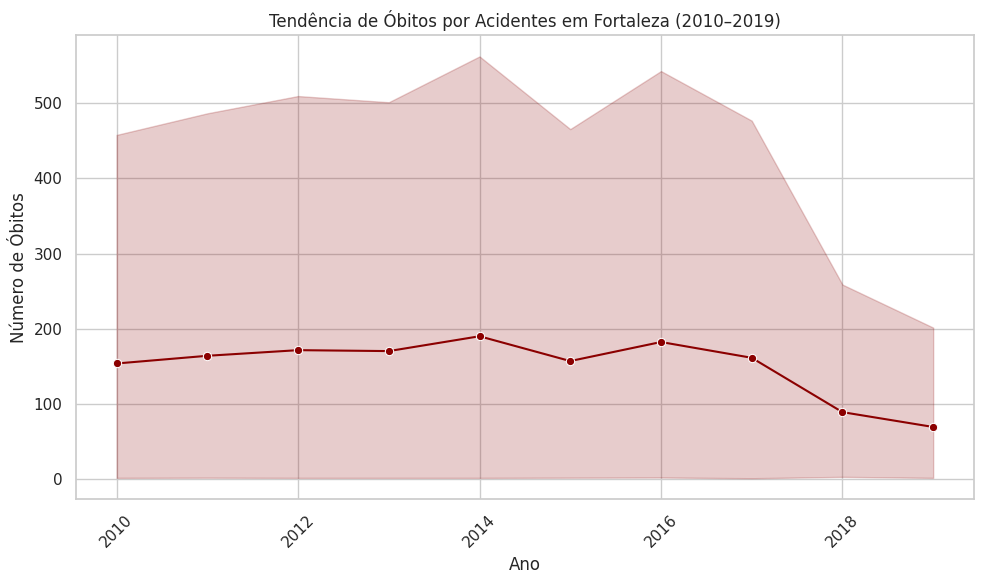

In [75]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Ano', y='Óbitos', marker='o', color='darkred')
plt.title('Tendência de Óbitos por Acidentes em Fortaleza (2010–2019)')
plt.xlabel('Ano')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
df.describe()

,Ano,Óbitos
count,60.00000,39.000000
mean,2014.50000,148.179487
std,2.89652,259.865641
min,2010.00000,1.000000
25%,2012.00000,2.000000
50%,2014.50000,4.000000
75%,2017.00000,139.000000
max,2019.00000,749.000000


In [77]:
summary_table = df.describe().loc[['mean', 'min', 'max']]

print("Tabela Resumo de Óbitos por Acidentes de Trânsito:")
display(summary_table)

Tabela Resumo de Óbitos por Acidentes de Trânsito:


,Ano,Óbitos
mean,2014.5,148.179487
min,2010.0,1.000000
max,2019.0,749.000000


In [78]:
# Filtrar os dados apenas para 'Fortaleza'
df_fortaleza_only = df[df['Nome'] == 'Fortaleza'].copy()

# Encontrar o ano com o maior número de óbitos
worst_year_row = df_fortaleza_only.loc[df_fortaleza_only['Óbitos'].idxmax()]
worst_year = int(worst_year_row['Ano'])
max_obitos = int(worst_year_row['Óbitos'])

# Calcular a média de óbitos no período
average_obitos = df_fortaleza_only['Óbitos'].mean()

# Calcular a redução percentual entre 2015 e 2019
obitos_2015 = df_fortaleza_only[df_fortaleza_only['Ano'] == 2015]['Óbitos'].iloc[0]
obitos_2019 = df_fortaleza_only[df_fortaleza_only['Ano'] == 2019]['Óbitos'].iloc[0]
reduction_percentage = ((obitos_2015 - obitos_2019) / obitos_2015) * 100

analytic_text = (
    f"Análise de Óbitos por Acidentes de Trânsito em Fortaleza (2010-2019):\n\n"
    f"O ano com o maior número de óbitos foi {worst_year}, com {max_obitos} óbitos.\n"
    f"A média de óbitos no período de 2010 a 2019 foi de aproximadamente {average_obitos:.0f} mortes por ano.\n"
    f"Houve uma redução de aproximadamente {reduction_percentage:.0f}% no número de óbitos entre 2015 ({int(obitos_2015)}) e 2019 ({int(obitos_2019)})."
)

print(analytic_text)

Análise de Óbitos por Acidentes de Trânsito em Fortaleza (2010-2019):

O ano com o maior número de óbitos foi 2014, com 749 óbitos.
A média de óbitos no período de 2010 a 2019 foi de aproximadamente 569 mortes por ano.
Houve uma redução de aproximadamente 57% no número de óbitos entre 2015 (620) e 2019 (268).
